Building a Hand digit recognition using ANN from scratch

dataset : self made

code : self made from scratch using only NumPy

In [ ]:
import cv2

In [ ]:
# img are represented in vector format, stored in digit_vectors
# and corresponding labels are stores in digit_labels

import numpy as np
import os
root_dir='digits'
files=os.listdir(root_dir)
preprocessed=[]
num_labels=[]
for file in files:
    file_path=os.path.join(root_dir, file)
    
    
    for img_name in os.listdir(file_path):
        img_path=os.path.join(file_path, img_name)
        img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(28,28))
        preprocessed.append(img.flatten()/255.0) # normalized digit vectorization
        num_labels.append(file) # corresponding digit labels


digit_vectors=np.array(preprocessed)
digit_labels=np.array(num_labels)
print(digit_vectors.shape)  
print(digit_labels.shape)



(1010, 784)
(1010,)


In [264]:
print(digit_vectors)


[[0.69019608 0.6627451  0.68627451 ... 0.65882353 0.6745098  0.6745098 ]
 [0.68235294 0.6745098  0.67058824 ... 0.64705882 0.65882353 0.66666667]
 [0.67843137 0.6627451  0.68235294 ... 0.66666667 0.65490196 0.65490196]
 ...
 [0.60392157 0.62352941 0.6        ... 0.63921569 0.63137255 0.63529412]
 [0.60784314 0.58823529 0.61176471 ... 0.62745098 0.63529412 0.62745098]
 [0.60392157 0.60784314 0.59607843 ... 0.61960784 0.61176471 0.63529412]]


In [265]:
print(digit_labels)

['0' '0' '0' ... '9' '9' '9']


In [ ]:
# dividing dataset into training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(digit_vectors, digit_labels,test_size=0.2,random_state=42,stratify=digit_labels)



In [267]:
print(X_train.shape)
print(X_test.shape)



(808, 784)
(202, 784)


In [ ]:
# one hot encoder,
# y train (808,1), but in y train, there are 10 digits (0-9)
# so, encoded y train's size should be (808,10)
# similary for y_test too
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse_output=False)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train_hot=enc.fit_transform(y_train)
y_test_hot=enc.fit_transform(y_test)

print(y_train_hot.shape)
print(y_test_hot.shape)

(808, 10)
(202, 10)


the ANN architecture for digit recognition consist of 5 layers

1 input layer (808,784), 3 hidden layer (128, 64, 32), 1 output layer (808,1)

In [269]:
# input to hidden layer 1
# w_ip_h1=np.random.uniform(low=-1.0, high=1.0, size=(784,128))
w_ip_h1=np.random.randn(784,128)*np.sqrt(2.0/784)
b_ip_h1=np.zeros((1,128))

# hidden layer 1 to hidden layer 2
# w_h1_h2 = np.random.uniform(low=-1.0, high=1.0, size=(128, 64))
w_h1_h2 = np.random.randn(128, 64)*np.sqrt(2.0/128)
b_h1_h2 = np.zeros((1, 64))

# hidden layer 2 to hidden layer 3
# w_h2_h3 = np.random.uniform(low=-1.0, high=1.0, size=(64, 32))
w_h2_h3 = np.random.randn(64, 32)*np.sqrt(2.0/64)
b_h2_h3 = np.zeros((1,32))

# hidden layer 3 to output layer
# w_h3_op = np.random.uniform(low=-1.0, high=1.0, size=(32, 10))
w_h3_op = np.random.randn(32, 10)*np.sqrt(2.0/32)
b_h3_op = np.zeros((1,10))

print(w_ip_h1.shape)
print(b_ip_h1.shape)
print(w_h1_h2.shape)
print(b_h1_h2.shape)
print(w_h2_h3.shape)
print(b_h2_h3.shape)
print(w_h3_op.shape)
print(b_h3_op.shape)

(784, 128)
(1, 128)
(128, 64)
(1, 64)
(64, 32)
(1, 32)
(32, 10)
(1, 10)


In [270]:
# activation function ReLu
def ReLu(z):
    # max(0,x)
    return np.maximum(0,z)

def ReLu_derivative(z):
    # 1 if x>0 else 0
    return (z>0).astype(float)


In [271]:
# softmax function

def softmax(logits):
    # logits = np.clip(logits, 1e-15, 1-1e-15)  # Prevent overflow
    logits = logits - np.max(logits, axis=1, keepdims=True)
    expscores = np.exp(logits)
    probs = expscores / np.sum(expscores, axis=1, keepdims=True)
    return probs


In [272]:
# categorical cross entropy function

def categorical_crossentropy(y_true_val, y_pred_val):
    # forcing probablities between tiny values to prevent log(0)=NaN
    y_pred_val = np.clip(y_pred_val, 1e-15, 1-1e-15)
    return -np.mean(np.sum(y_true_val*np.log(y_pred_val), axis=1))



In [ ]:
# training, testing loop

lr=0.0001
epochs=10000

for epoch in range(epochs):

    # Training
    # forward pass
    z1 = X_train@w_ip_h1+b_ip_h1  # (808,128)
    a1 = ReLu(z1)  # (808,128)

    z2 = a1@w_h1_h2+b_h1_h2  # (808,64)
    a2 = ReLu(z2)  # (808,64)

    z3 = a2@w_h2_h3+b_h2_h3  # (808,32)
    a3 = ReLu(z3)  # (808,32)

    z4 = a3@w_h3_op+b_h3_op  # (808,10)

    # softmax probablity
    y_pred_train=softmax(logits=z4)

    # loss function
    L_train=categorical_crossentropy(y_true_val=y_train_hot, y_pred_val=y_pred_train)

    # backpropagation
    # output layer to hidden layer 3
    # weight gradients
    # dL/dw_h3_op = dL/dy_pred * dy_pred/dz4 * dz4/dw_h3_op
    # dL/dz4 = dL/dy_pred * dy_pred/dz4
    # dL/dw_h3_op = dL/dz4 * dz4/dw_h3_op

    # dL_dy_pred = y_pred - y_train_hot # (808,10)
    # dy_pred_dz4 = y_pred - y_train_hot # (808,10)
    # dL_dz4 = dL_dy_pred * dy_pred_dz4 # (808,10)

    N=X_train.shape[0]
    dL_dz4 = (y_pred_train - y_train_hot)/N # (808,10)


    dz4_dw_h3_op=a3 # (808,32)

    dL_dw_h3_op=dz4_dw_h3_op.T @ dL_dz4 # (32,10)


    # bias gradients
    # dL/db_h3_op = dL/dy_pred * dy_pred/dz4 * dz4/db_h3_op
    # dL/dz4 = dL/dy_pred * dy_pred/dz4
    # dL/db_h3_op = dL/dz4 * dz4/db_h3_op
    # dz4/db_h3_op = 1

    dL_db_h3_op=np.sum(dL_dz4, axis=0, keepdims=True) # (1,10)


    # hidden layer 3 to hidden layer 2
    # weight gradients
    # dL/dw_h2_h3 = dL/da3 * da3/dz3 * dz3/dw_h2_h3
    # dL/da3 = dL/dy_pred * dy_pred/dz4 * dz4/da3
    # dL/dz4 = dL/dy_pred * dy_pred/dz4
    # dL/da3 = dL/dz4 * dz4/da3
    # dL/dz4 : (808,10)

    dz4_da3 = w_h3_op # (32,10)

    dL_da3 = dL_dz4 @ dz4_da3.T # (808,32)
    da3_dz3 = ReLu_derivative(z3) # (808,32)
    dz3_dw_h2_h3 = a2 # (808,64)

    # dL/dz3 = dL/da3 * da3/dz3
    dL_dz3 = dL_da3 * da3_dz3 # (808,32)


    # dL/dw_h2_h3 = dL/dz3 * dz3/dw_h2_h3
    dL_dw_h2_h3 = dz3_dw_h2_h3.T @ dL_dz3 # (64,32)


    # bias gradients
    # dL/db_h2_h3 = dL/da3 * da3/dz3 * dz3/db_h2_h3
    # dL/db_h2_h3 = dL/dz3 * dz3/db_h2_h3
    # dz3/db_h2_h3 = 1
    dL_db_h2_h3 = np.sum(dL_dz3, axis=0, keepdims=True) # (1,32)


    # hidden layer 2 to hidden layer 1
    # weight gradients
    # dL/dw_h1_h2 = dL/da2 * da2/dz2 * dz2/dw_h1_h2
    # dL/da2 = dL/da3 * da3/dz3 * dz3/da2
    # dL/da2 = dL/dz3 * dz3/da2
    dL_dz3 = dL_da3 * da3_dz3  # (808,32)
    dz3_da2 = w_h2_h3 # (64,32)
    dL_da2 = dL_dz3 @ dz3_da2.T # (808,64)

    da2_dz2 =  ReLu_derivative(z2) # (808,64)

    # dL/dz2 = dL/da2 * da2/dz2
    dL_dz2 = dL_da2 * da2_dz2 # (808,64)

    dz2_dw_h1_h2 = a1 # (808,128)

    # dL/dw_h1_h2 = dL/da2 * da2/dz2 * dz2/dw_h1_h2
    # dL/dw_h1_h2 = dL/dz2 * dz2/dw_h1_h2
    dL_dw_h1_h2 = dz2_dw_h1_h2.T @ dL_dz2 # (128,64)


    # bias gradients
    # dL/db_h1_h2 = dL/da2 * da2/dz2 * dz2/db_h1_h2
    # dL/db_h1_h2 = dL/dz2 * dz2/db_h1_h2
    dz2_db_h1_h2 = 1
    dL_db_h1_h2 = np.sum(dL_dz2, axis=0, keepdims=True) # (1,64)


    # Hidden Layer 1 to Input Layer
    # dL/dw_ip_h1 = dL/da1 * da1/dz1 * dz1/dw_ip_h1
    # dL/da1 = dL/da2 * da2/dz2 * dz2/da1
    # dL/da1 = dL/dz2 * dz2/da1
    dz2_da1 = w_h1_h2 # (128,64)
    dL_dz2 = dL_da2 * da2_dz2  # (808,64)

    dL_da1 = dL_dz2 @ dz2_da1.T # (808,128)

    da1_dz1 = ReLu_derivative(z1) # (808,128)

    # dL/dz1 = dL/da1 * da1/dz1
    dL_dz1 = dL_da1 * da1_dz1 # (808,128)

    dz1_dw_ip_h1 = X_train # (808,784)

    # dL/dw_ip_h1 = dL/da1 * da1/dz1 * dz1/dw_ip_h1
    # dL/dw_ip_h1 = dL/dz1 * dz1/dw_ip_h1
    dL_dw_ip_h1 = dz1_dw_ip_h1.T @ dL_dz1 # (784,128)


    # bias gradients
    # dL/db_ip_h1 = dL/da1 * da1/dz1 * dz1/db_ip_h1
    # dL/db_ip_h1 = dL/dz1 * dz1/db_ip_h1
    dz1_db_ip_h1 = 1
    dL_db_ip_h1 = np.sum(dL_dz1, axis=0, keepdims=True) # (1, 128)


    # updation
    # output to hidden 3
    w_h3_op -= lr*dL_dw_h3_op
    b_h3_op -= lr*dL_db_h3_op

    # hidden 3 to hidden 2
    w_h2_h3 -= lr*dL_dw_h2_h3
    b_h2_h3 -= lr*dL_db_h2_h3

    # hidden 2 to hidden 1
    w_h1_h2 -= lr*dL_dw_h1_h2
    b_h1_h2 -= lr*dL_db_h1_h2

    # hidden 1 to input
    w_ip_h1 -= lr*dL_dw_ip_h1
    b_ip_h1 -= lr*dL_db_ip_h1


    # Testing
    # forward pass
    z1 = X_test@w_ip_h1+b_ip_h1  # (202,128)
    a1 = ReLu(z1)  # (202,128)

    z2 = a1@w_h1_h2+b_h1_h2  # (202,64)
    a2 = ReLu(z2)  # (202,64)

    z3 = a2@w_h2_h3+b_h2_h3  # (202,32)
    a3 = ReLu(z3)  # (202,32)

    z4 = a3@w_h3_op+b_h3_op  # (202,10)

    # softmax probablity
    y_pred_test = softmax(logits=z4)

    # loss function
    L_test = categorical_crossentropy(y_true_val=y_test_hot, y_pred_val=y_pred_test)




    if (epoch%1000)==0:
        print(f"Epoch: {epoch}| Train Loss: {L_train}| Test Loss: {L_test}")


Epoch: 0| Train Loss: 2.366148167495323| Test Loss: 2.364842862119504
Epoch: 1000| Train Loss: 2.2660204279675424| Test Loss: 2.2730802691210927
Epoch: 2000| Train Loss: 2.230877960608891| Test Loss: 2.2399845417522135
Epoch: 3000| Train Loss: 2.2102387631986993| Test Loss: 2.220480067807914
Epoch: 4000| Train Loss: 2.189146412649585| Test Loss: 2.2014574506320708
Epoch: 5000| Train Loss: 2.168259213108437| Test Loss: 2.181323142015241
Epoch: 6000| Train Loss: 2.1480378917268133| Test Loss: 2.1620144950994575
Epoch: 7000| Train Loss: 2.1275862319942833| Test Loss: 2.1423181622707754
Epoch: 8000| Train Loss: 2.107022792203563| Test Loss: 2.122221712751712
Epoch: 9000| Train Loss: 2.085991448362866| Test Loss: 2.1017304691229786


In [284]:
# testing on an image
test_root_dir='test'
test_files=os.listdir(test_root_dir)

for img in test_files:
    test_img_path=os.path.join(test_root_dir, img)
    test_img=cv2.imread(test_img_path, cv2.IMREAD_GRAYSCALE)
    test_img=cv2.resize(test_img,(28,28))
    test_img=test_img.flatten()/255.0

X_test_input=test_img.reshape(1,-1) 
print(X_test_input.shape)


(1, 784)


In [285]:

def forward_pass(X,
                 w_ip_h1, b_ip_h1,
                 w_h1_h2, b_h1_h2,
                 w_h2_h3, b_h2_h3,
                 w_h3_op, b_h3_op):

    z1 = X @ w_ip_h1 + b_ip_h1
    a1 = ReLu(z1)

    z2 = a1 @ w_h1_h2 + b_h1_h2
    a2 = ReLu(z2)

    z3 = a2 @ w_h2_h3 + b_h2_h3
    a3 = ReLu(z3)

    z4 = a3 @ w_h3_op + b_h3_op
    y_pred = softmax(z4)

    return y_pred


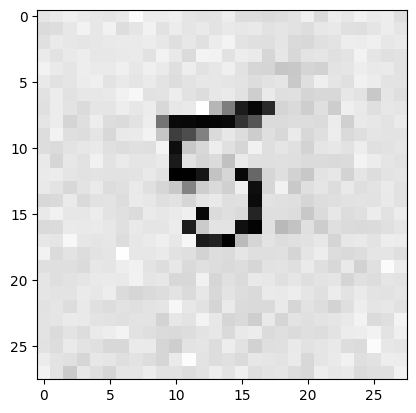

Predicted Digit: 5


In [289]:
import matplotlib.pyplot as plt

y_pred = forward_pass(
    X_test_input,
    w_ip_h1, b_ip_h1,
    w_h1_h2, b_h1_h2,
    w_h2_h3, b_h2_h3,
    w_h3_op, b_h3_op
)
plt.imshow(X_test_input.reshape(28,28),cmap='gray')
plt.show()
print("Predicted Digit:", np.argmax(y_pred))